author: Maarten Vonk

In this Notebook the features are the result of the model with 
1.  R2:     0.8254136927187563
2.  RMSE:   9674.930479377197

Goal of this notebook is to check out what features are most important when predicting the Sales Price.

# Import Settings Packages and Feature Importance

In [123]:
# Import packages
# Dataframe and plot imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint


# Date time imports
import datetime as dt
import pytz
import datetime
from pytz import UTC
from pytz import timezone

# Model imports
import statsmodels.api as sm
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sma
import statsmodels.multivariate.manova as smm
import scipy.stats as sps
import pylab
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [124]:
# Set display settings
rc = {'lines.linewidth': 2, 'font.sans-serif': ['DejaVu Sans']}
sns.set_context('notebook', rc=rc, font_scale=1.25)
sns.set_style('whitegrid', rc=rc)

# Show more columns of pandas dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

# Change default plot size
plt.rcParams['figure.figsize'] = (10, 6)

In [125]:
#Import data and set index as first column
data=pd.read_csv("./data/input/AI_data.csv", sep=',', index_col=0)


In [126]:
# Import feature_data and we need to change the format of the feature data in order to reestablish original features.(very ugly)
feature_data=pd.read_csv("./data/input/feature_performance.csv", sep=',')
feature_data=feature_data.T
feature_data.columns=feature_data.ix['Feature_name']
feature_data=feature_data.ix['Feature_importance']

C:\Users\u03mvo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\u03mvo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [127]:
# Since we used one hot decoding, we need to sum the values of all the dummy variables to reestablish original feature
Enclosure=data['Enclosure'].unique().tolist()
PG=data['Product Group'].unique().tolist()
Hydr=data['Hydraulics'].unique().tolist()
# We modified datasource so we define the seperate columns manually
ds=['D136', 'D121', 'D132', 'D172', 'D149']
PCD=data['Product Class Description'].unique().tolist()
SoU=data['State of Usage'].unique().tolist()

In [128]:
# Create new values within the feature data series that describes the orignal feature and summates over the dummy variables
feature_data['Enclosure'] = feature_data[Enclosure].sum()
feature_data['Product Grou'] = feature_data[PG].sum()
feature_data['Hydraulics'] = feature_data[Hydr].sum()
feature_data['datasource'] = feature_data[ds].sum()
feature_data['Product Class Description'] = feature_data[PCD].sum()

# Features Importance Plot

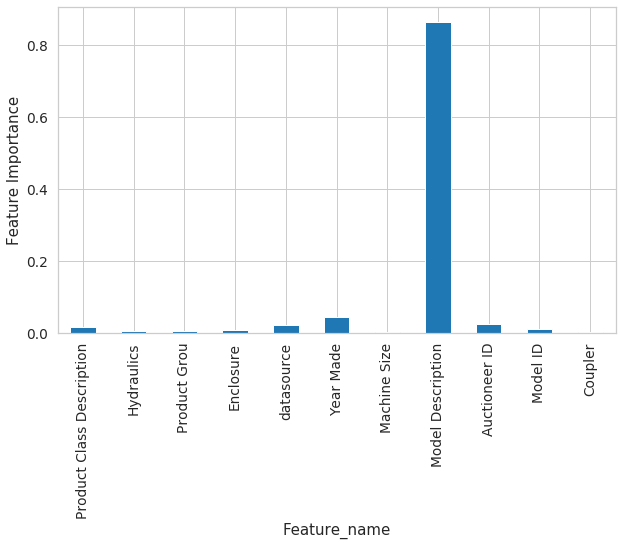

In [129]:
# Plot feature importance
feature_data[['Product Class Description','Hydraulics','Product Grou','Enclosure','datasource',
             'Year Made','Machine Size','Model Description','Auctioneer ID', 'Model ID','Coupler']].plot.bar(y='Feature Importance')
plt.ylabel('Feature Importance')
plt.show()

Model Description seems like the most important feature. In future endeavors it might be usefull to exploit this feature (since
it already conisists of 2 features (Basic Model and Secondary Description))